<a href="https://colab.research.google.com/github/som-himte/CAPSTONE-PROJECT-AIRbnb-DATA-ANALYSIS/blob/main/Airbnb_Bookings_Analysis(Som_Himte)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [10]:
# Importing libraries for analysing the dataset
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Importing of Dataset
airbnb_data = pd.read_csv("/content/Airbnb NYC 2019 (2).csv")
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
# checking the size of Data
airbnb_data.shape


(48895, 16)

In [14]:
# Checking the column name 
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Checking for Categorical and Numerical Columns

In [15]:
# Checking for categorical columns 
cat_var = [i for i in airbnb_data.columns if airbnb_data[i].dtype=='O']
cat_var

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [16]:
# Checking for numwerical columns 
num_var = [i for i in airbnb_data.columns if airbnb_data[i].dtype!='O']
num_var

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

### Cleaning the Dataset


In [17]:
# Get the count of null values in each columns
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
temp_df = pd.DataFrame({'columns':airbnb_data.columns,'missing %':airbnb_data.isnull().sum()/len(airbnb_data)})
temp_df

,columns,missing %
id,id,0.000000
name,name,0.000327
host_id,host_id,0.000000
host_name,host_name,0.000429
neighbourhood_group,neighbourhood_group,0.000000
neighbourhood,neighbourhood,0.000000
latitude,latitude,0.000000
longitude,longitude,0.000000
room_type,room_type,0.000000
price,price,0.000000


#### From above obsevation we can find that the data in the column name has 0.03% data missing and column host_name has 0.043% data missing. So we can repalce missing values with 'Unknown'

In [19]:
airbnb_data['name'].fillna('Unknown', inplace=True)
airbnb_data['host_name'].fillna('Unknown', inplace=True)

In [20]:
airbnb_data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### From above obsevation we can find that the data in the column last_review  and column reviews_per_month has 20.55% data missing. So we can simply drop those columns as we don't need those columns in our analysis.

In [21]:
clean_df = airbnb_data.drop(["last_review","reviews_per_month"], axis=1)

In [22]:
clean_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Now there are no missing values in clean_df. So we can move to further analysis.

In [23]:
# Droping columns - id and host_id because they will not be used in our analysis. 
clean_df.drop(["id","host_id"], axis=1,inplace=True)

In [24]:
# checking final cleaned dataset
clean_df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [25]:
# lets rename clean_df as airbnb_data
airbnb_data = clean_df.copy()
airbnb_data.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## **Exploratory Data Analysis**

QUESSTION: **Top 10 expensive neighborhoods ?**

In [26]:
# finding top 10 expensive properties from data
top_10_expensive_properties = airbnb_data.sort_values(by=['price'], ascending=False).head(10)
top_10_expensive_properties[['name','price']]

,name,price
9151,Furnished room in Astoria apartment,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000
29238,1-BR Lincoln Center,10000
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999
6530,Spanish Harlem Apt,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500
4377,Film Location,8000
29662,East 72nd Townhouse by (Hidden by Airbnb),7703
42523,70' Luxury MotorYacht on the Hudson,7500


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

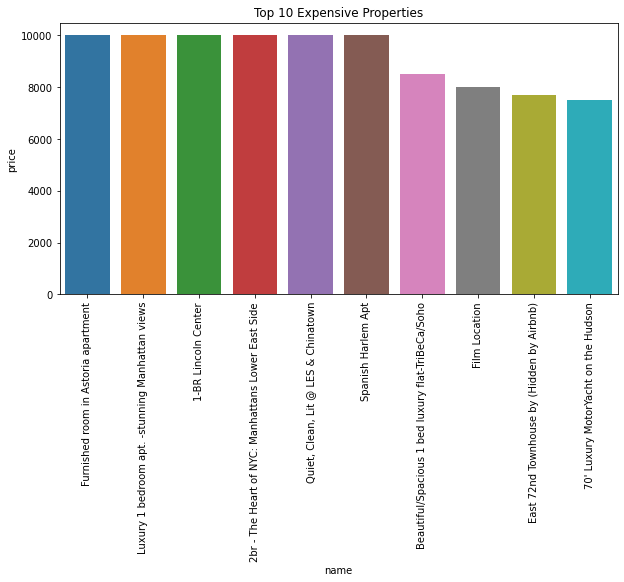

In [29]:
# visual representation of expensive properties
plt.figure(figsize=(10,5))

sns.barplot(x="name",y="price",data = top_10_expensive_properties)
plt.title("Top 10 Expensive Properties")
plt.xticks(rotation=90)

There are three properties that are most expensive in NYC of price 10000 per night.

QUESTION:**WHAT IS AVERAGE AVAILABILITY OF PROPERTIES BY ROOM TYPES?**

In [30]:
# checking the availability of properties
avg_availability_of_property = airbnb_data.groupby(['room_type'])['availability_365'].mean().reset_index()
avg_availability_of_property

,room_type,availability_365
0,Entire home/apt,111.920304
1,Private room,111.203933
2,Shared room,162.000862


From the above table, we can observe that the average avalability of shared rooms is higher than others i.e 162 days out of 365.

Text(0.5, 0, 'room types')

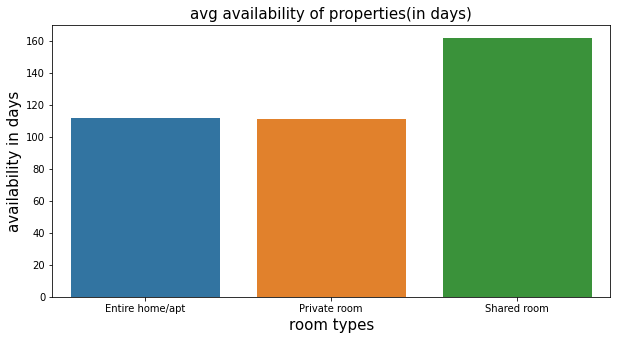

In [31]:
# graphical representation of conclusion
plt.figure(figsize=(10,5))
bar_plot=sns.barplot(x="room_type",y="availability_365",data = avg_availability_of_property)
plt.title("avg availability of properties(in days)", fontsize = 15)
bar_plot.set_ylabel("availability in days", fontsize = 15)
bar_plot.set_xlabel("room types", fontsize = 15)